<a href="https://colab.research.google.com/github/tasmimjoti/Computer-Vision/blob/main/Glaucoma_Detection_(Grad_CAM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Reshape, BatchNormalization, UpSampling2D, LeakyReLU, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import random
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical # Import to_categorical

# **Dataset Loading**

In [ ]:
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Glaucoma Detection/acrima"

In [ ]:
folders = os.listdir(dataset_path)
print("Folders inside dataset:", folders)

Folders inside dataset: ['advance_glaucoma', 'normal_glaucoma']


In [ ]:
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        images = os.listdir(folder_path)
        print(f"📁 {folder} → {len(images)} images")
        print(f"🔹 Sample images: {images[:5]}")  # Show first 5 images

📁 advance_glaucoma → 397 images
🔹 Sample images: ['AG292.jpg', 'AG46.jpg', 'AG208.jpg', 'AG340.jpg', 'AG90.jpg']
📁 normal_glaucoma → 309 images
🔹 Sample images: ['NC40.jpg', 'NC178.jpg', 'NC211.jpg', 'NC124.jpg', 'NC173.jpg']


In [ ]:
def load_dataset(dataset_path, img_height=128, img_width=128):
    X = []
    y = []
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            for image_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, image_name)
                try:
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.resize(img, (img_width, img_height))
                        X.append(img)
                        y.append(folder)
                    else:
                        print(f"Warning: Could not read image {img_path}")
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(X), np.array(y)

In [ ]:
# Load dataset
X, y = load_dataset(dataset_path)
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
unique_classes, class_counts = np.unique(y, return_counts=True)

print("Size of each class:")
for class_name, count in zip(unique_classes, class_counts):
    print(f"{class_name}: {count}")

Size of each class:
advance_glaucoma: 397
normal_glaucoma: 309


In [ ]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (706, 128, 128, 3)
Shape of y: (706,)


### **Encoding the target labels**

In [ ]:
# Convert string labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# **CNN**

In [ ]:
# CNN Model
def build_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(set(y)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - accuracy: 0.5572 - loss: 1.1437 - val_accuracy: 0.7324 - val_loss: 0.6099
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7849 - loss: 0.4678 - val_accuracy: 0.8592 - val_loss: 0.3346
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8598 - loss: 0.3778 - val_accuracy: 0.6408 - val_loss: 0.6513
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8411 - loss: 0.3994 - val_accuracy: 0.8944 - val_loss: 0.2791
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8649 - loss: 0.3068 - val_accuracy: 0.9014 - val_loss: 0.2790
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8970 - loss: 0.2867 - val_accuracy: 0.9085 - val_loss: 0.2034
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9205 - loss: 0.2189 - val_accuracy: 0.9296 - val_loss: 0.1911
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8959 - loss: 0.2422 - val_accuracy: 0.9014 - 

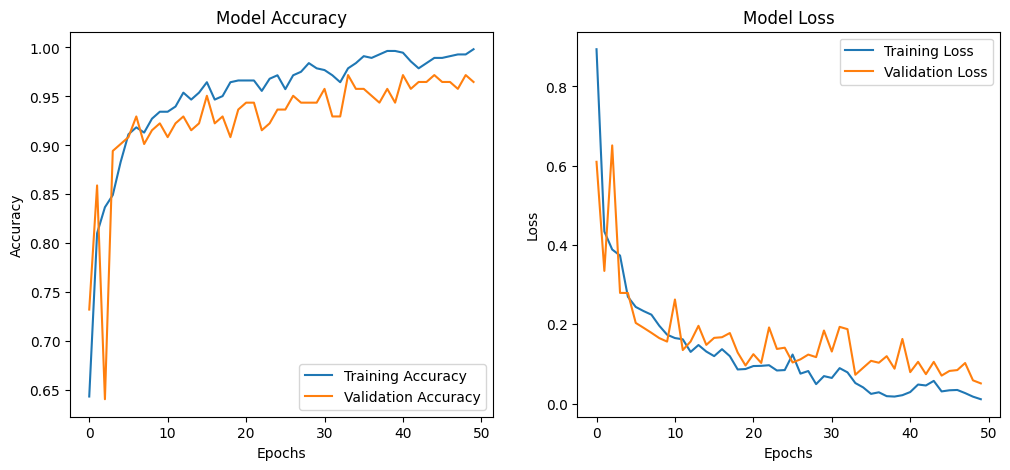

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    # Access history data using history.history
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy")
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    # Access history data using history.history
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Model Loss")
    plt.legend()

    plt.show()

cnn_model = build_cnn()

# Pass the history object returned by model.fit
# Encode the augmented labels before training
history = cnn_model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test, y_test_encoded))
plot_training_history(history)

In [ ]:
# Evaluate model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test_encoded)
print(f"✅ Improved Accuracy: {test_acc * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9648 - loss: 0.0545 
✅ Improved Accuracy: 96.48%


In [ ]:
y_pred = cnn_model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test_encoded, y_pred.argmax(axis=1)) # Get predicted class labels
print(f"Model Accuracy: {accuracy:.4f}")

# Initialize and fit LabelEncoder
from sklearn.preprocessing import LabelEncoder  # Ensure LabelEncoder is imported
label_encoder = LabelEncoder()
label_encoder.fit(y) # Fit the encoder to your original labels (y)

print("Classification Report:\n", classification_report(y_test_encoded, y_pred.argmax(axis=1), target_names=label_encoder.classes_)) # Get predicted class labels

Model Accuracy: 0.9648
Classification Report:
                   precision    recall  f1-score   support

advance_glaucoma       0.98      0.97      0.97        93
 normal_glaucoma       0.94      0.96      0.95        49

        accuracy                           0.96       142
       macro avg       0.96      0.96      0.96       142
    weighted avg       0.97      0.96      0.96       142



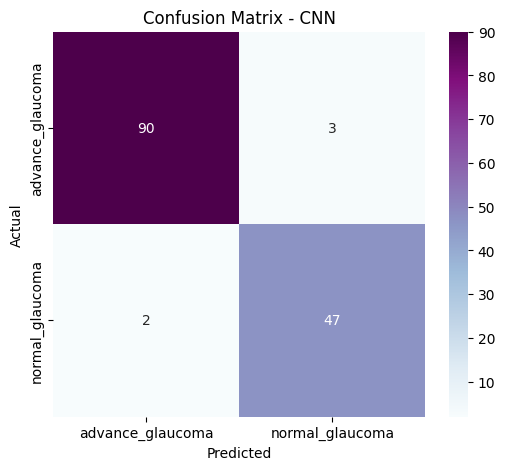

In [ ]:
# Assuming label_encoder was previously defined and fitted
class_labels = label_encoder.classes_ # Get class labels from LabelEncoder

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


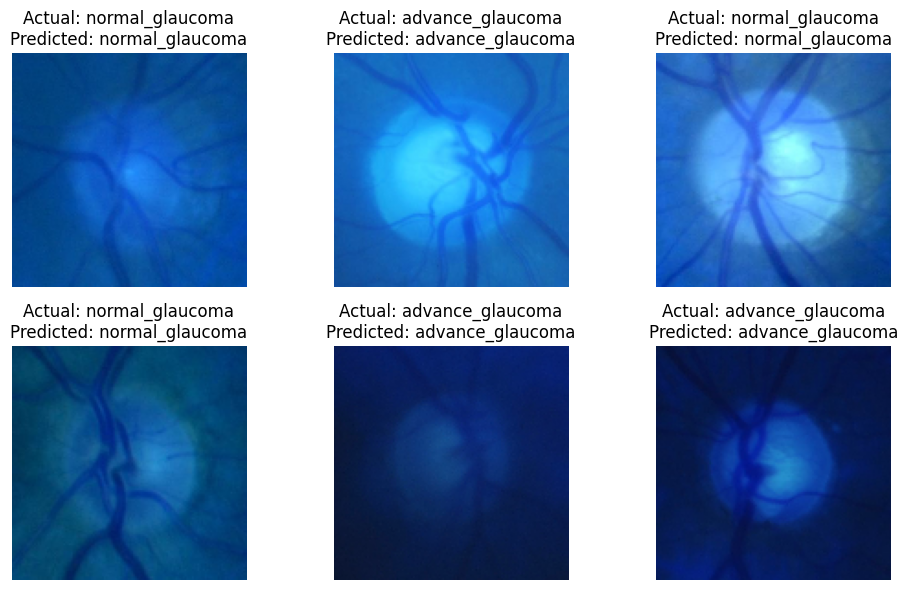

In [ ]:
def show_predictions(model, X_test, y_test, label_encoder):
    plt.figure(figsize=(10, 6))

    for i in range(6):  # Show 6 test samples
        idx = random.randint(0, len(X_test) - 1)
        img = X_test[idx] # Get the image directly

        # Use the original y_test labels
        actual_label = y_test[idx]

        # Predict label
        # Reshape for prediction: add batch dimension and keep original height, width, channels
        pred_prob = cnn_model.predict(img.reshape(1, 128, 128, 3))
        pred_label_index = np.argmax(pred_prob)

        # Ensure label_encoder is fitted with all possible labels if not done already
        # label_encoder.fit(np.concatenate((y_train, y_test))) # This is done outside the function now

        pred_label = label_encoder.inverse_transform([pred_label_index])[0]

        plt.subplot(2, 3, i + 1)
        # Display the color image
        plt.imshow(img)
        plt.title(f"Actual: {actual_label}\nPredicted: {pred_label}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Fit label_encoder with all possible labels before calling show_predictions
label_encoder.fit(np.concatenate((y_train, y_test)))
show_predictions(cnn_model, X_test, y_test, label_encoder)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


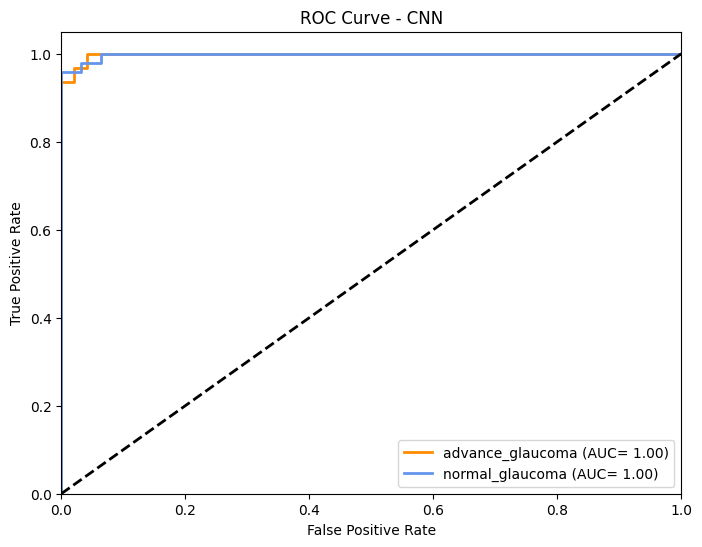

In [ ]:
# Binarize the true labels for each class using to_categorical
y_test_bin_cnn = to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

# Get predicted probabilities for each class from the CNN model
# Assuming cnn_model is already trained and available
y_pred_prob_cnn = cnn_model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr_cnn = dict()
tpr_cnn = dict()
roc_auc_cnn = dict()
n_classes = len(label_encoder.classes_)

for i in range(n_classes):
    fpr_cnn[i], tpr_cnn[i], _ = roc_curve(y_test_bin_cnn[:, i], y_pred_prob_cnn[:, i])
    roc_auc_cnn[i] = auc(fpr_cnn[i], tpr_cnn[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))

colors = ['darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_cnn[i], tpr_cnn[i], color=color, lw=2,
             label='{0} (AUC= {1:0.2f})'
             ''.format(label_encoder.classes_[i], roc_auc_cnn[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CNN')
plt.legend(loc="lower right")
plt.show()

# **VGG16**

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - accuracy: 0.6003 - loss: 0.7951 - val_accuracy: 0.8451 - val_loss: 0.3871
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8653 - loss: 0.3702 - val_accuracy: 0.8521 - val_loss: 0.3419
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8592 - loss: 0.3325 - val_accuracy: 0.8803 - val_loss: 0.2926
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9040 - loss: 0.2529 - val_accuracy: 0.8803 - val_loss: 0.2930
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9006 - loss: 0.2503 - val_accuracy: 0.8451 - val_loss: 0.3763
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9284 - loss: 0.2165 - val_accuracy: 0.8873 - val_loss: 0.2957
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8976 - loss: 0.2586 - val_accuracy: 0.8944 - val_loss: 0.3044
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accur

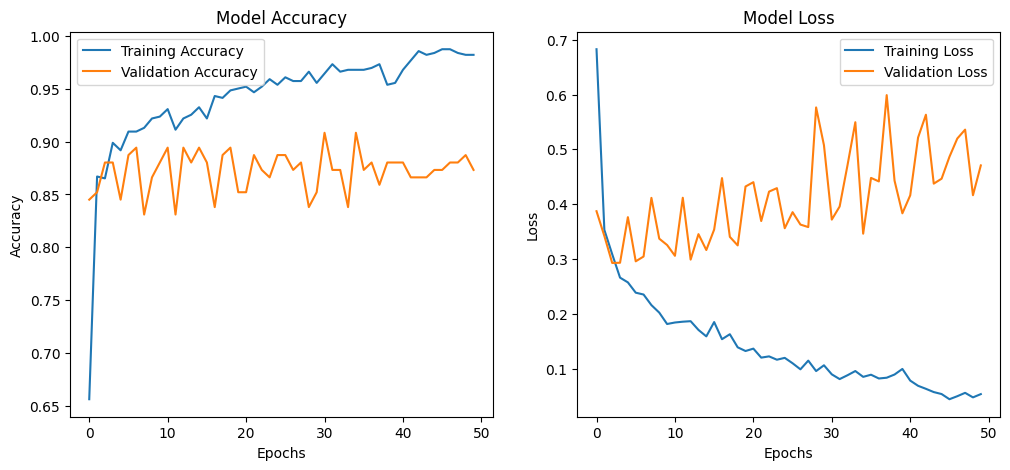

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    # Access history data using history.history
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy")
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    # Access history data using history.history
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Model Loss")
    plt.legend()

    plt.show()

# Resize data for VGG16 (which expects 64x64 input) before training
img_height_vgg16 = 64
img_width_vgg16 = 64

X_train_resized = np.array([cv2.resize(img, (img_width_vgg16, img_height_vgg16)) for img in X_train])
X_test_resized = np.array([cv2.resize(img, (img_width_vgg16, img_height_vgg16)) for img in X_test])

# Ensure data has 3 channels for VGG16 if needed
X_train_3_channel = X_train_resized
if X_train_resized.shape[-1] == 1:
    X_train_3_channel = np.repeat(X_train_resized, 3, axis=-1)

X_test_3_channel = X_test_resized
if X_test_resized.shape[-1] == 1:
    X_test_3_channel = np.repeat(X_test_resized, 3, axis=-1)

# Check if vgg16_model is already compiled
if 'vgg16_model' not in locals():
    # Load the VGG16 model pre-trained on ImageNet, excluding the top classification layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

    # Add new classification layers
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(len(set(y)), activation='softmax')(x)

    # Create the new model
    vgg16_model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model
    vgg16_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the modified VGG16 model on resized training data (without augmentation)
history_vgg16 = vgg16_model.fit(X_train_3_channel, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_3_channel, y_test_encoded))

# Plot training history
plot_training_history(history_vgg16)

In [ ]:
def show_predictions(model, X_test, y_test, label_encoder):
    plt.figure(figsize=(10, 6))

    for i in range(6):  # Show 6 test samples
        idx = random.randint(0, len(X_test) - 1)
        # Ensure image has 3 channels if the model expects it
        img = X_test[idx]
        if img.shape[-1] == 1 and model.input_shape[-1] == 3:
            img = np.repeat(img, 3, axis=-1)
        img = img.reshape(64, 64, img.shape[-1])


        # Fix: Use the original y_test labels instead of inverse_transform
        actual_label = y_test[idx]

        # Predict label
        # Ensure input to predict has the correct shape (batch size, height, width, channels)
        img_for_prediction = np.expand_dims(img, axis=0)
        pred_label_index = np.argmax(model.predict(img_for_prediction))


        # Fix: Ensure label_encoder is fitted with all possible labels
        label_encoder.fit(np.concatenate((y_train, y_test)))
        pred_label = label_encoder.inverse_transform([pred_label_index])[0]

        plt.subplot(2, 3, i + 1)
        # Display grayscale or color image correctly
        if img.shape[-1] == 1:
             plt.imshow(img.squeeze(), cmap="gray")
        else:
             plt.imshow(img)

        plt.title(f"Actual: {actual_label}\nPredicted: {pred_label}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8735 - loss: 0.4944
✅ VGG16 Test Accuracy: 87.32%
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
✅ VGG16 Accuracy: 87.32%

VGG16 Classification Report:
                   precision    recall  f1-score   support

advance_glaucoma       0.94      0.86      0.90        93
 normal_glaucoma       0.77      0.90      0.83        49

        accuracy                           0.87       142
       macro avg       0.86      0.88      0.86       142
    weighted avg       0.88      0.87      0.88       142



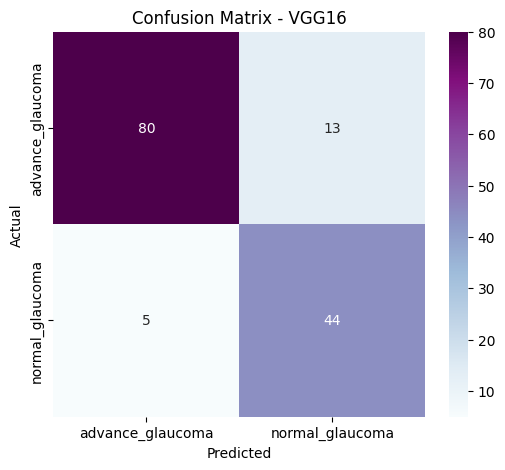

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


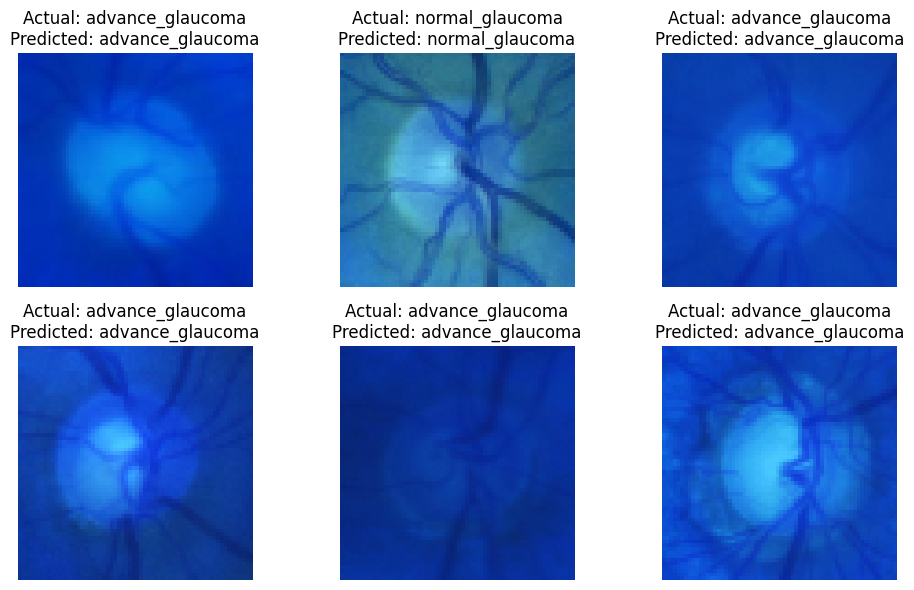

In [ ]:
# Evaluate VGG16
test_loss_vgg16, test_acc_vgg16 = vgg16_model.evaluate(X_test_3_channel, y_test_encoded)
print(f"✅ VGG16 Test Accuracy: {test_acc_vgg16 * 100:.2f}%")

# Make predictions
y_pred_vgg16 = vgg16_model.predict(X_test_3_channel)

# Convert predictions to class labels
y_pred_labels_vgg16 = np.argmax(y_pred_vgg16, axis=1)

# Calculate and print accuracy
accuracy_vgg16 = accuracy_score(y_test_encoded, y_pred_labels_vgg16)
print(f"✅ VGG16 Accuracy: {accuracy_vgg16 * 100:.2f}%")

# Generate and print classification report
print("\nVGG16 Classification Report:\n", classification_report(y_test_encoded, y_pred_labels_vgg16, target_names=label_encoder.classes_))

# Generate and print confusion matrix
conf_matrix_vgg16 = confusion_matrix(y_test_encoded, y_pred_labels_vgg16)

# Plot confusion matrix for VGG16
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_vgg16, annot=True, fmt='d', cmap='BuPu', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - VGG16')
plt.show()

# Show sample predictions for VGG16
show_predictions(vgg16_model, X_test_3_channel, y_test, label_encoder)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


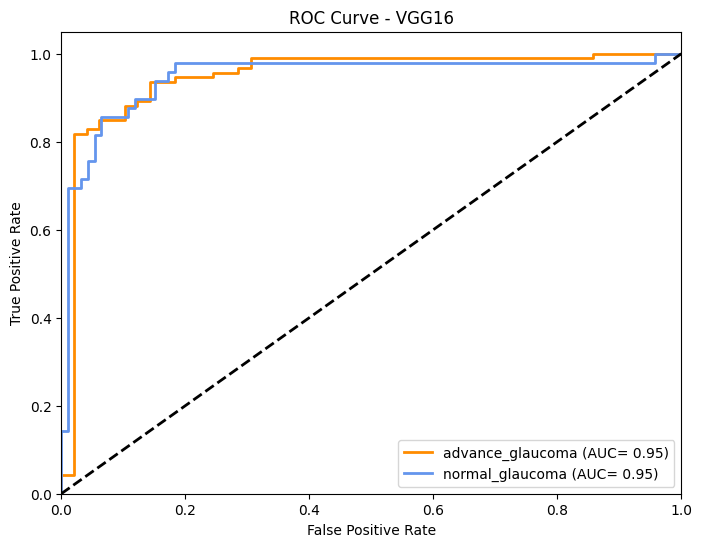

In [ ]:
# Binarize the true labels for each class using to_categorical
# This will ensure a two-column output for binary classification
y_test_bin = to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))


# Get predicted probabilities for each class
y_pred_prob_vgg16 = vgg16_model.predict(X_test_3_channel)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_encoder.classes_) # Use the original number of classes

for i in range(n_classes):
    # Ensure we are using the correct column for the true labels and predicted probabilities
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_vgg16[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))

colors = ['darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (AUC= {1:0.2f})'
             ''.format(label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - VGG16')
plt.legend(loc="lower right")
plt.show()

# **ConvNeXt**

In [ ]:
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.layers import GlobalAveragePooling2D

# ConvNeXt Model Definition
def build_convnext(input_shape, num_classes):
    # Load the ConvNeXtBase model pre-trained on ImageNet, excluding the top classification layer
    base_model = ConvNeXtBase(weights='imagenet', include_top=False, input_shape=input_shape)

    # Add new classification layers
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='gelu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Create the new model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Prepare data for ConvNeXt (expects 224x224x3 input)
img_height_convnext = 224
img_width_convnext = 224

# Resize images
X_train_convnext = np.array([cv2.resize(img, (img_width_convnext, img_height_convnext)) for img in X_train])
X_test_convnext = np.array([cv2.resize(img, (img_width_convnext, img_height_convnext)) for img in X_test])

# Ensure data has 3 channels for ConvNeXt (already handled if original images are color)
if X_train_convnext.shape[-1] == 1:
    X_train_convnext = np.repeat(X_train_convnext, 3, axis=-1)

if X_test_convnext.shape[-1] == 1:
    X_test_convnext = np.repeat(X_test_convnext, 3, axis=-1)

print(f"Shape of X_train_convnext: {X_train_convnext.shape}")
print(f"Shape of X_test_convnext: {X_test_convnext.shape}")

# Define ConvNeXt model
convnext_model = build_convnext(input_shape=(img_height_convnext, img_width_convnext, 3), num_classes=len(label_encoder.classes_))

# Compile the model with a slightly higher learning rate
convnext_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train ConvNeXt model
history_convnext = convnext_model.fit(X_train_convnext, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_convnext, y_test_encoded))

# Plot training history (reuse the previously defined function)
plot_training_history(history_convnext)

Shape of X_train_convnext: (564, 224, 224, 3)
Shape of X_test_convnext: (142, 224, 224, 3)
350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.5123 - loss: 1.2842 - val_accuracy: 0.3451 - val_loss: 0.8009
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 446ms/step - accuracy: 0.5424 - loss: 0.7904 - val_accuracy: 0.6479 - val_loss: 0.6519
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 446ms/step - accuracy: 0.5160 - loss: 0.7315 - val_accuracy: 0.3451 - val_loss: 0.7504
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - accuracy: 0.4750 - loss: 0.7290 - val_accuracy: 0.6549 - val_loss: 0.6483
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 0.5507 - loss: 0.7283 - val_accuracy: 0.6549 - val_loss: 0.6491
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 388ms/step - accuracy: 0.4962 - loss: 0.7172 - val_accuracy: 0.6549 - val_loss: 0.6637
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 386ms/step - accuracy: 0.5318 - loss: 0.7061 -

In [ ]:
# Evaluate ConvNeXt model
test_loss_convnext, test_acc_convnext = convnext_model.evaluate(X_test_convnext, y_test_encoded)
print(f"✅ ConvNeXt Test Accuracy: {test_acc_convnext * 100:.2f}%")

# Make predictions
y_pred_convnext = convnext_model.predict(X_test_convnext)

# Convert predictions to class labels
y_pred_labels_convnext = np.argmax(y_pred_convnext, axis=1)

# Calculate and print accuracy
accuracy_convnext = accuracy_score(y_test_encoded, y_pred_labels_convnext)
print(f"✅ ConvNeXt Accuracy: {accuracy_convnext * 100:.2f}%")

# Generate and print classification report
print("\nConvNeXt Classification Report:\n", classification_report(y_test_encoded, y_pred_labels_convnext, target_names=label_encoder.classes_))

In [ ]:
# Generate and print confusion matrix for ConvNeXt
conf_matrix_convnext = confusion_matrix(y_test_encoded, y_pred_labels_convnext)

# Plot confusion matrix for ConvNeXt
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_convnext, annot=True, fmt='d', cmap='BuPu', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ConvNeXt')
plt.show()

In [ ]:
# Show sample predictions for ConvNeXt (reuse the show_predictions function, adapting for ConvNeXt input)
def show_predictions_convnext(model, X_test, y_test, label_encoder):
    plt.figure(figsize=(10, 6))

    for i in range(6):  # Show 6 test samples
        idx = random.randint(0, len(X_test) - 1)
        img = X_test[idx] # Get the image directly

        # Use the original y_test labels
        actual_label = y_test[idx]

        # Predict label
        # Ensure input to predict has the correct shape (batch size, height, width, channels)
        img_for_prediction = np.expand_dims(img, axis=0)
        pred_prob = model.predict(img_for_prediction)
        pred_label_index = np.argmax(pred_prob)

        pred_label = label_encoder.inverse_transform([pred_label_index])[0]

        plt.subplot(2, 3, i + 1)
        # Display the color image
        plt.imshow(img)
        plt.title(f"Actual: {actual_label}\nPredicted: {pred_label}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Need to use the original y_test for actual labels
show_predictions_convnext(convnext_model, X_test_convnext, y_test, label_encoder)

In [ ]:
# Binarize the true labels for each class using to_categorical for ConvNeXt
y_test_bin_convnext = to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

# Get predicted probabilities for each class from the ConvNeXt model
y_pred_prob_convnext = convnext_model.predict(X_test_convnext)

# Compute ROC curve and ROC area for each class for ConvNeXt
fpr_convnext = dict()
tpr_convnext = dict()
roc_auc_convnext = dict()
n_classes = len(label_encoder.classes_) # Use the original number of classes

for i in range(n_classes):
    # Ensure we are using the correct column for the true labels and predicted probabilities
    fpr_convnext[i], tpr_convnext[i], _ = roc_curve(y_test_bin_convnext[:, i], y_pred_prob_convnext[:, i])
    roc_auc_convnext[i] = auc(fpr_convnext[i], tpr_convnext[i])

# Plot the ROC curves for ConvNeXt
plt.figure(figsize=(8, 6))

colors = ['darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_convnext[i], tpr_convnext[i], color=color, lw=2,
             label='{0} (AUC= {1:0.2f})'
             ''.format(label_encoder.classes_[i], roc_auc_convnext[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Class-wise Receiver Operating Characteristic (ROC) Curve for ConvNeXt')
plt.legend(loc="lower right")
plt.show()

# **Hybrid Model (CNN-VGG16)**

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 299ms/step - accuracy: 0.5720 - loss: 1.6622 - val_accuracy: 0.8521 - val_loss: 0.4346
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8101 - loss: 0.4273 - val_accuracy: 0.8521 - val_loss: 0.2986
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8600 - loss: 0.3388 - val_accuracy: 0.8803 - val_loss: 0.2663
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8630 - loss: 0.3230 - val_accuracy: 0.8944 - val_loss: 0.2864
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9132 - loss: 0.2417 - val_accuracy: 0.9085 - val_loss: 0.2495
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9266 - loss: 0.1920 - val_accuracy: 0.9085 - val_loss: 0.2292
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9148 - loss: 0.1851 - val_accuracy: 0.9085 - val_loss: 0.2588
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9234 - loss: 0.1883 - val_accuracy: 0.8944 -

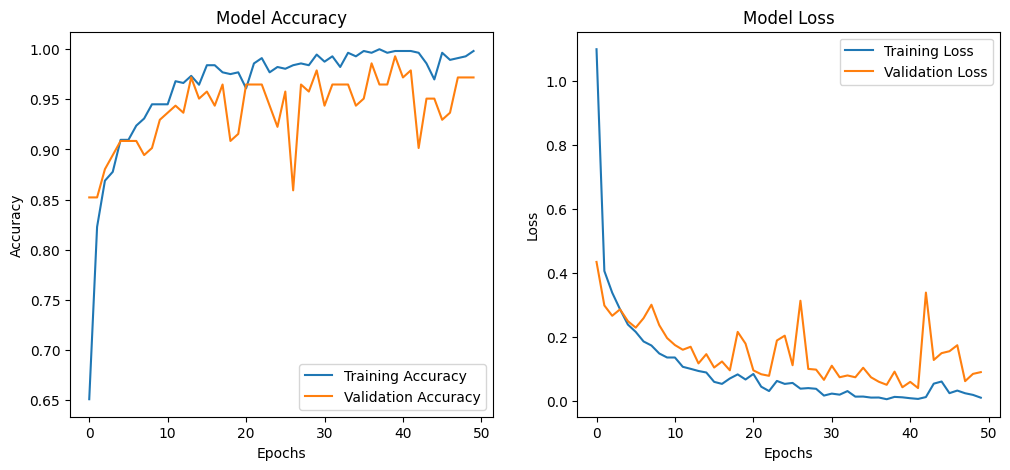

In [ ]:
# Define the hybrid model
def build_hybrid_model(input_shape_cnn, input_shape_vgg16, num_classes):
    # CNN branch
    cnn_input = Input(shape=input_shape_cnn, name='cnn_input')
    cnn_branch = Conv2D(32, (3, 3), activation='relu', padding='same')(cnn_input)
    cnn_branch = MaxPooling2D((2, 2))(cnn_branch)
    cnn_branch = Conv2D(64, (3, 3), activation='relu', padding='same')(cnn_branch)
    cnn_branch = MaxPooling2D((2, 2))(cnn_branch)
    cnn_branch = Flatten()(cnn_branch)
    cnn_branch = Dense(128, activation='relu')(cnn_branch)
    cnn_branch = Dropout(0.5)(cnn_branch)

    # VGG16 branch
    # Load the VGG16 model pre-trained on ImageNet, excluding the top classification layer
    base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape_vgg16)
    # Freeze the layers of the base model
    for layer in base_model_vgg16.layers:
        layer.trainable = False
    vgg16_branch_output = base_model_vgg16.output
    vgg16_branch = Flatten()(vgg16_branch_output)
    vgg16_branch = Dense(256, activation='relu')(vgg16_branch)
    vgg16_branch = Dropout(0.5)(vgg16_branch)


    # Combine branches
    combined = tf.keras.layers.concatenate([cnn_branch, vgg16_branch])

    # Output layer
    predictions = Dense(num_classes, activation='softmax')(combined)

    # Create the hybrid model
    hybrid_model = Model(inputs=[cnn_input, base_model_vgg16.input], outputs=predictions)

    # Compile the model
    hybrid_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return hybrid_model

# Prepare data for hybrid model (CNN input is 128x128x3, VGG16 input is 64x64x3)
# Reuse X_train, X_test, y_train_encoded, y_test_encoded from previous steps for CNN input
# Reuse X_train_3_channel, X_test_3_channel from VGG16 step for VGG16 input

# Define input shapes
input_shape_cnn = (128, 128, 3)
input_shape_vgg16 = (64, 64, 3)
num_classes = len(label_encoder.classes_)

# Build the hybrid model
hybrid_model = build_hybrid_model(input_shape_cnn, input_shape_vgg16, num_classes)

# Train the hybrid model
# Input to fit needs to be a list of inputs corresponding to the model's inputs
history_hybrid = hybrid_model.fit([X_train, X_train_3_channel], y_train_encoded, epochs=50, batch_size=32, validation_data=([X_test, X_test_3_channel], y_test_encoded))

# Plot training history (reuse the previously defined function)
plot_training_history(history_hybrid)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9832 - loss: 0.0712
✅ Hybrid Model Test Accuracy: 97.18%
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step
✅ Hybrid Model Accuracy: 97.18%

Hybrid Model Classification Report:
                   precision    recall  f1-score   support

advance_glaucoma       0.97      0.99      0.98        93
 normal_glaucoma       0.98      0.94      0.96        49

        accuracy                           0.97       142
       macro avg       0.97      0.96      0.97       142
    weighted avg       0.97      0.97      0.97       142



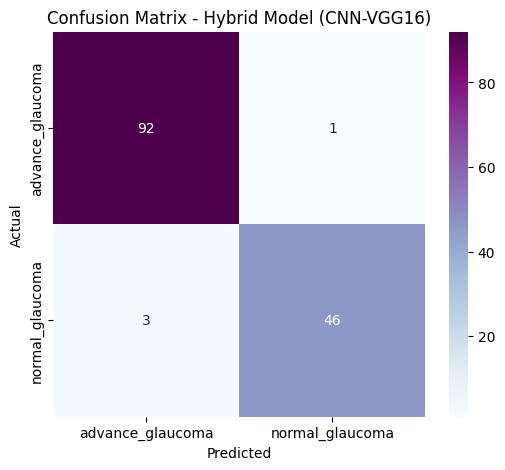

In [ ]:
# Evaluate hybrid model
test_loss_hybrid, test_acc_hybrid = hybrid_model.evaluate([X_test, X_test_3_channel], y_test_encoded)
print(f"✅ Hybrid Model Test Accuracy: {test_acc_hybrid * 100:.2f}%")

# Make predictions
y_pred_hybrid = hybrid_model.predict([X_test, X_test_3_channel])

# Convert predictions to class labels
y_pred_labels_hybrid = np.argmax(y_pred_hybrid, axis=1)

# Calculate and print accuracy
accuracy_hybrid = accuracy_score(y_test_encoded, y_pred_labels_hybrid)
print(f"✅ Hybrid Model Accuracy: {accuracy_hybrid * 100:.2f}%")

# Generate and print classification report
print("\nHybrid Model Classification Report:\n", classification_report(y_test_encoded, y_pred_labels_hybrid, target_names=label_encoder.classes_))

# Generate and print confusion matrix
conf_matrix_hybrid = confusion_matrix(y_test_encoded, y_pred_labels_hybrid)
# Plot confusion matrix for Hybrid Model
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_hybrid, annot=True, fmt='d', cmap='BuPu', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Hybrid Model (CNN-VGG16)')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


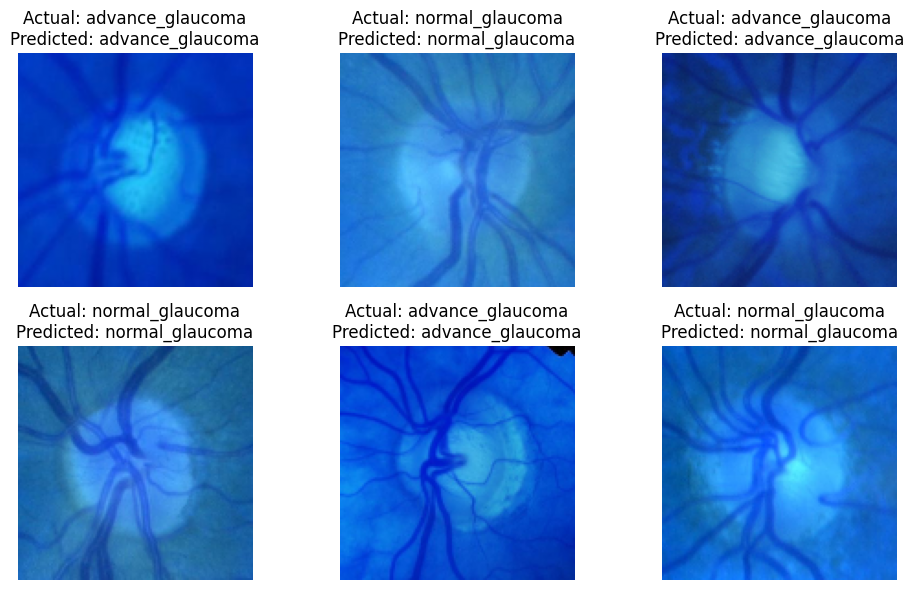

In [ ]:
# Show sample predictions for Hybrid Model (adapt the show_predictions function)
def show_predictions_hybrid(model, X_test_cnn, X_test_vgg16, y_test, label_encoder):
    plt.figure(figsize=(10, 6))

    for i in range(6):  # Show 6 test samples
        idx = random.randint(0, len(X_test_cnn) - 1)
        img_cnn = X_test_cnn[idx]
        img_vgg16 = X_test_vgg16[idx]

        # Use the original y_test labels
        actual_label = y_test[idx]

        # Predict label
        # Ensure input to predict has the correct shape (batch size, height, width, channels)
        img_cnn_for_prediction = np.expand_dims(img_cnn, axis=0)
        img_vgg16_for_prediction = np.expand_dims(img_vgg16, axis=0)

        pred_prob = model.predict([img_cnn_for_prediction, img_vgg16_for_prediction])
        pred_label_index = np.argmax(pred_prob)

        pred_label = label_encoder.inverse_transform([pred_label_index])[0]

        plt.subplot(2, 3, i + 1)
        # Display the color image (using the CNN input image as it's higher resolution)
        plt.imshow(img_cnn)
        plt.title(f"Actual: {actual_label}\nPredicted: {pred_label}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Need to use the original y_test for actual labels
show_predictions_hybrid(hybrid_model, X_test, X_test_3_channel, y_test, label_encoder)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


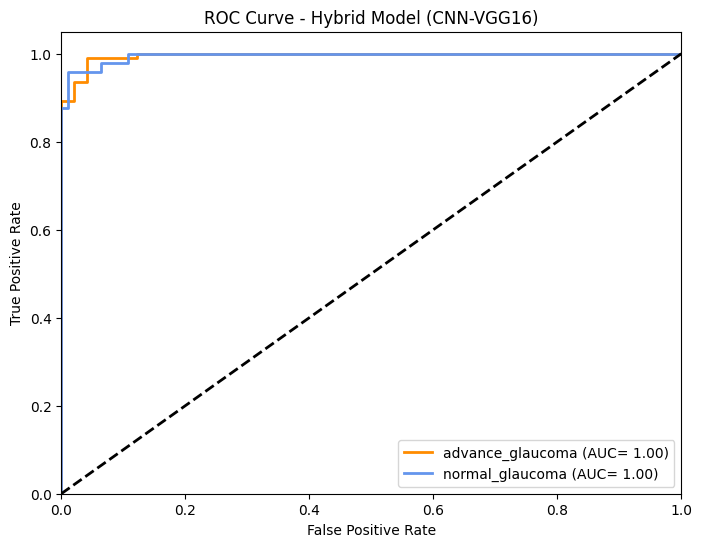

In [ ]:
# Binarize the true labels for each class for Hybrid Model
y_test_bin_hybrid = to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

# Get predicted probabilities for each class from the Hybrid model
y_pred_prob_hybrid = hybrid_model.predict([X_test, X_test_3_channel])

# Compute ROC curve and ROC area for each class for Hybrid Model
fpr_hybrid = dict()
tpr_hybrid = dict()
roc_auc_hybrid = dict()
n_classes = len(label_encoder.classes_) # Use the original number of classes

for i in range(n_classes):
    # Ensure we are using the correct column for the true labels and predicted probabilities
    fpr_hybrid[i], tpr_hybrid[i], _ = roc_curve(y_test_bin_hybrid[:, i], y_pred_prob_hybrid[:, i])
    roc_auc_hybrid[i] = auc(fpr_hybrid[i], tpr_hybrid[i])

# Plot the ROC curves for Hybrid Model
plt.figure(figsize=(8, 6))

colors = ['darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_hybrid[i], tpr_hybrid[i], color=color, lw=2,
             label='{0} (AUC= {1:0.2f})'
             ''.format(label_encoder.classes_[i], roc_auc_hybrid[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Hybrid Model (CNN-VGG16)')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_420']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


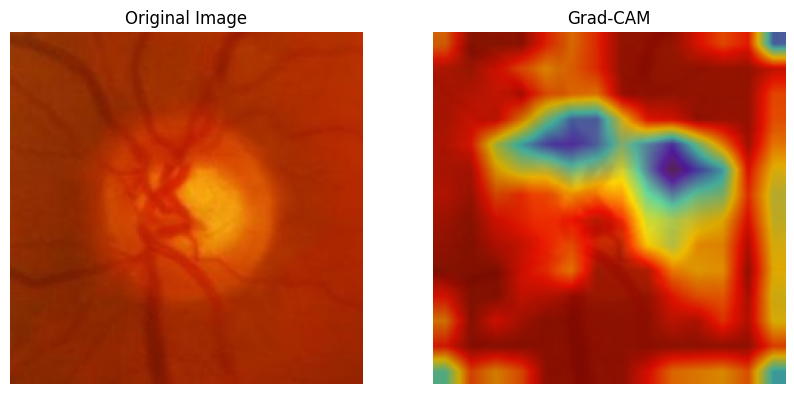

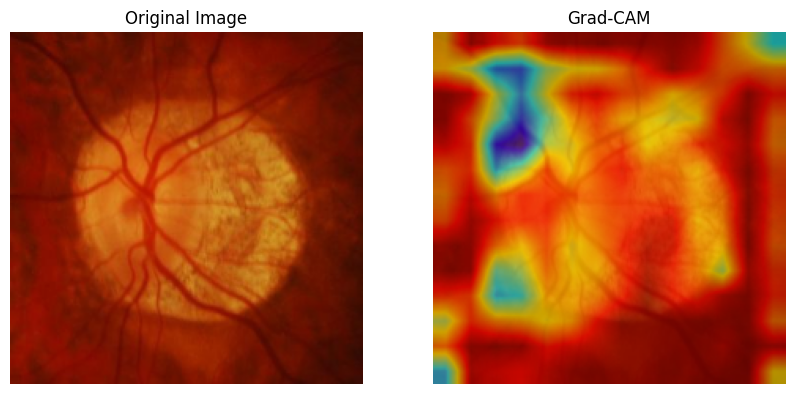

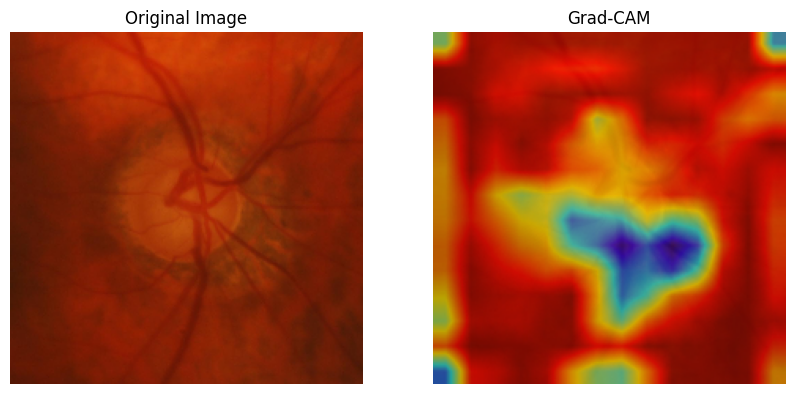

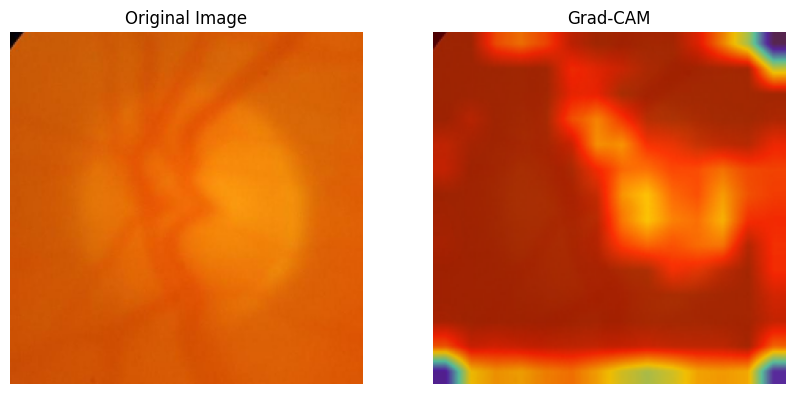

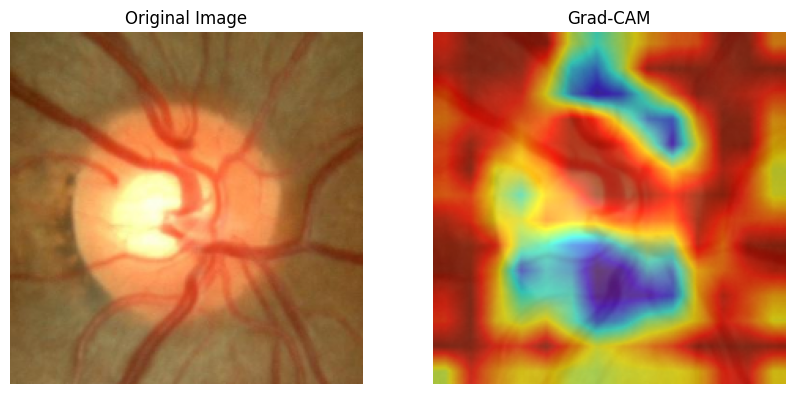

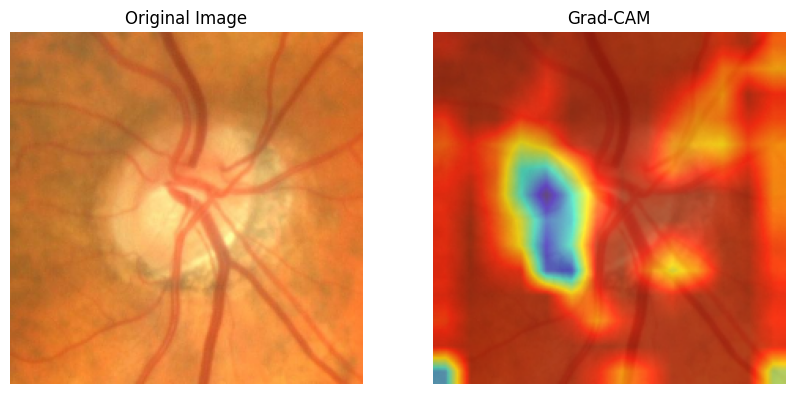

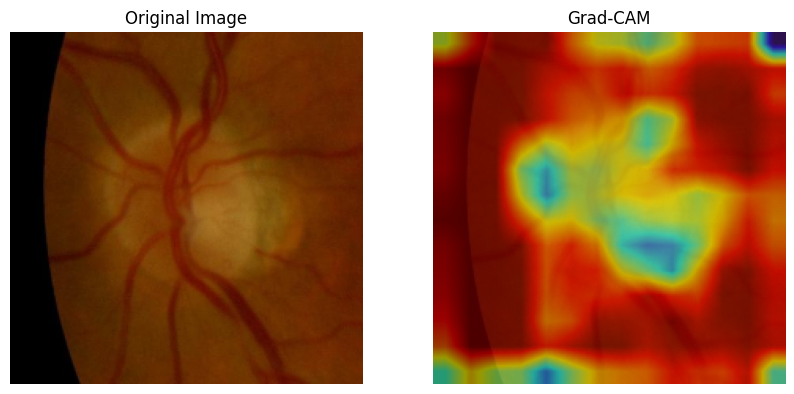

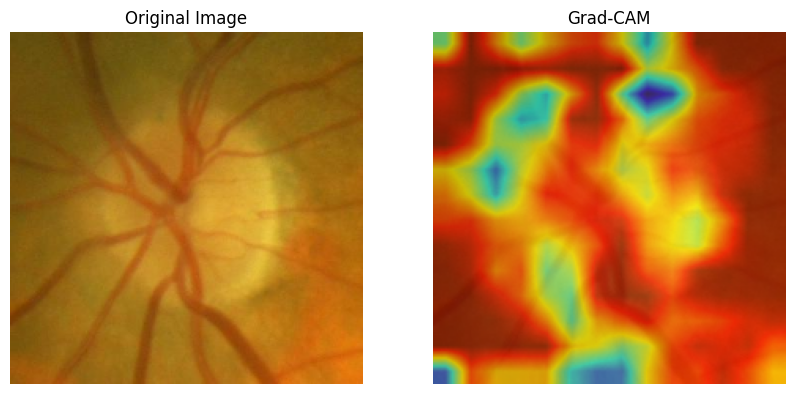

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet')

# Function to generate Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name='block5_conv3'):
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    grad_model = tf.keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Function to display the Grad-CAM visualization
def save_and_display_gradcam_from_array(img_array, heatmap, alpha=0.4):
    img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(img, alpha, heatmap_colored, 1 - alpha, 0)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title("Grad-CAM")
    plt.axis("off")

    plt.show()

# Load and process images from the uploaded files
image_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Glaucoma Detection/acrima/advance_glaucoma/AG122.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Glaucoma Detection/acrima/advance_glaucoma/AG53.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Glaucoma Detection/acrima/advance_glaucoma/AG62.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Glaucoma Detection/acrima/advance_glaucoma/AG112.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Glaucoma Detection/acrima/normal_glaucoma/NC48.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Glaucoma Detection/acrima/normal_glaucoma/NC82.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Glaucoma Detection/acrima/normal_glaucoma/NC43.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Glaucoma Detection/acrima/normal_glaucoma/NC209.jpg'
]

images = [cv2.imread(img_path) for img_path in image_paths]

# Process each image
for img in images:
    img_resized = cv2.resize(img, (224, 224))  # Resize to 224x224 for VGG16 input size
    img_array = image.img_to_array(img_resized)
    img_array = preprocess_input(img_array)  # Preprocess image for VGG16

    # Generate the Grad-CAM heatmap for each image
    gradcam_heatmap = make_gradcam_heatmap(img_array, model)

    # Display the Grad-CAM visualization
    save_and_display_gradcam_from_array(img_resized, gradcam_heatmap, alpha=0.4)